In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn mlxtend


In [2]:
# Install the ucimlrepo package if not already installed
# pip install ucimlrepo
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch the dataset
online_retail = fetch_ucirepo(id=352)

# Extract data and metadata
X = online_retail.data.features  # Features
y = online_retail.data.targets   # Targets (if available)
metadata = online_retail.metadata  # Metadata about the dataset
variables = online_retail.variables  # Variable information

# Combine features and targets into a single DataFrame (if needed)
df = pd.concat([X, y], axis=1)

# Inspect the metadata and variable information
print("Metadata:", metadata)
print("Variable Information:", variables)

# Display the first few rows of the dataset
print(df.head())


Metadata: {'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based custome

In [3]:
# Remove rows where 'CustomerID' is missing and reset the index
df.dropna(subset=['CustomerID'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Create 'TotalAmount' column
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract additional time-based features
df['Month'] = df['InvoiceDate'].dt.month
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Hour'] = df['InvoiceDate'].dt.hour

# Display the data again
print(df.head())


                           Description  Quantity         InvoiceDate  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   UnitPrice  CustomerID         Country  TotalAmount  Month  Weekday  Hour  
0       2.55     17850.0  United Kingdom        15.30     12        2     8  
1       3.39     17850.0  United Kingdom        20.34     12        2     8  
2       2.75     17850.0  United Kingdom        22.00     12        2     8  
3       3.39     17850.0  United Kingdom        20.34     12        2     8  
4       3.39     17850.0  United Kingdom        20.34     12        2     8  


            Quantity                    InvoiceDate      UnitPrice  \
count  401528.000000                         401528  401528.000000   
mean       12.183723  2011-07-10 12:12:07.670498816       3.474295   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 12:03:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       250.306467                            NaN      69.770623   

          CustomerID    TotalAmount          Month        Weekday  \
count  401528.000000  401528.000000  401528.000000  401528.000000   
mean    15281.185711      20.613519       7.595361       2.598818   
min     12346.000000 -168469.600000       1.000000       0.000000   
25%     13939.000000       4.250000       5.000000       1.000000   
50%     15145.000000    

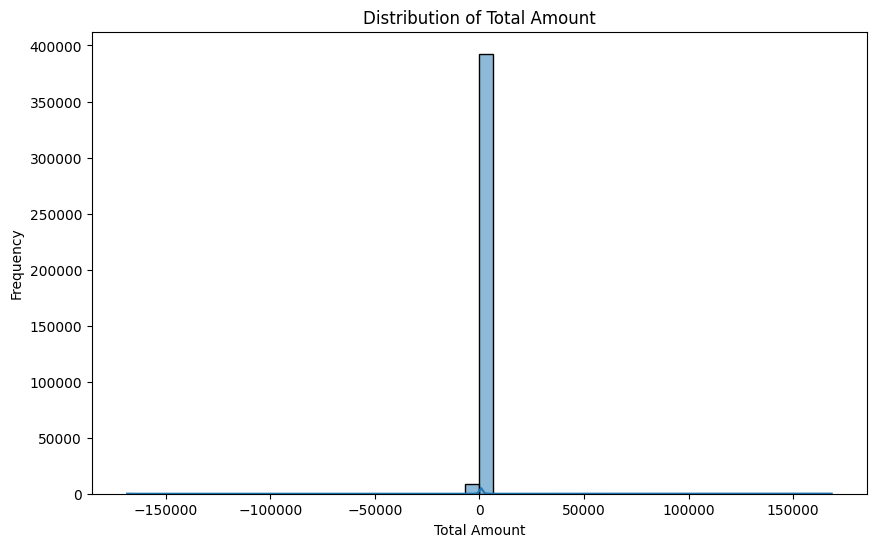

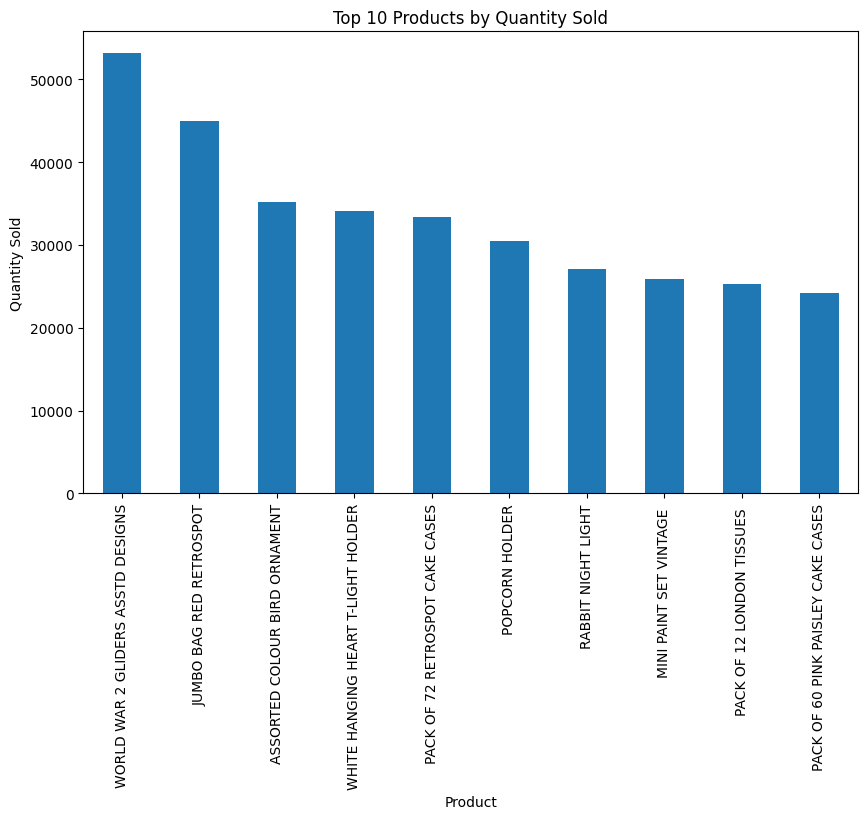

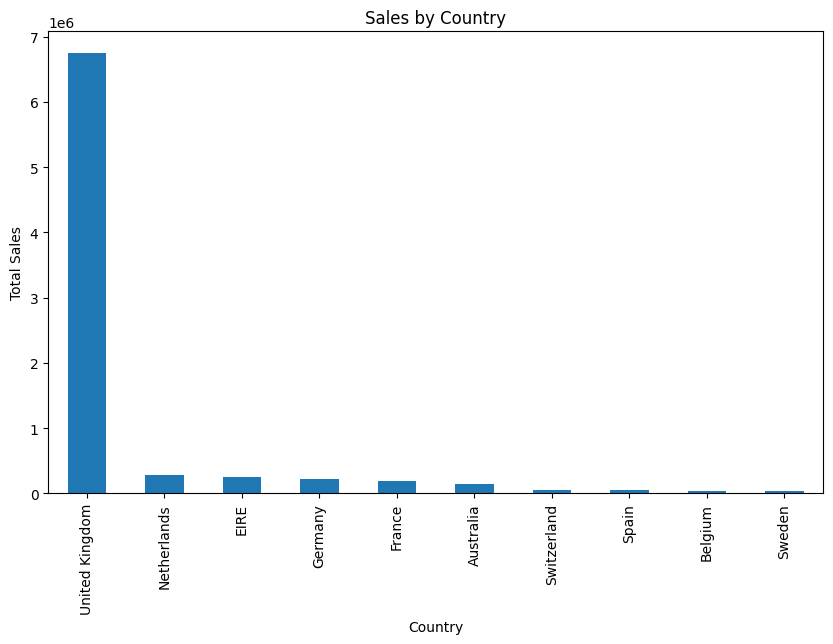

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())

# Plot distribution of TotalAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalAmount'], bins=50, kde=True)
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

# Top 10 most popular products by quantity sold
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.show()

# Sales by country
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()


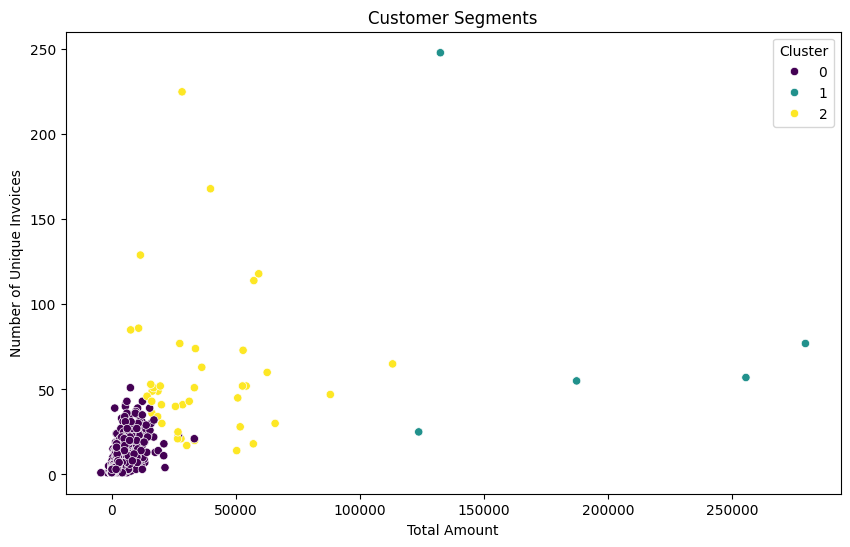

[[-0.06648815 -0.06539622 -0.06792553]
 [23.60387774  9.44684873 20.48385021]
 [ 4.13678951  5.7480442   4.66894112]]


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
customer_data = df.groupby('CustomerID').agg({
    'TotalAmount': 'sum',
    'InvoiceDate': 'nunique',
    'Quantity': 'sum'
}).reset_index()

# Normalize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalAmount', 'InvoiceDate', 'Quantity']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalAmount', y='InvoiceDate', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Total Amount')
plt.ylabel('Number of Unique Invoices')
plt.show()

# Display cluster centers
print(kmeans.cluster_centers_)


In [11]:
pip install --upgrade mlxtend

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(frequent_itemsets.head())
print(frequent_itemsets.columns)


    support                         itemsets
0  0.051616      (ALARM CLOCK BAKELIKE RED )
1  0.080521  (ASSORTED COLOUR BIRD ORNAMENT)
2  0.050260  (BAKING SET 9 PIECE RETROSPOT )
3  0.056689          (HEART OF WICKER SMALL)
4  0.051085         (JAM MAKING SET PRINTED)
Index(['support', 'itemsets'], dtype='object')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
import mlxtend
print(mlxtend.__version__)


0.23.3


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
from mlxtend.frequent_patterns import apriori, association_rules

# Apply the Apriori algorithm to get frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Ensure it has the necessary columns
print(frequent_itemsets.head())
print(frequent_itemsets.columns)

# Generate the association rules using the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

# Display the top 5 association rules sorted by lift
print(rules.sort_values(by='lift', ascending=False).head())



    support                         itemsets
0  0.051616      (ALARM CLOCK BAKELIKE RED )
1  0.080521  (ASSORTED COLOUR BIRD ORNAMENT)
2  0.050260  (BAKING SET 9 PIECE RETROSPOT )
3  0.056689          (HEART OF WICKER SMALL)
4  0.051085         (JAM MAKING SET PRINTED)
Index(['support', 'itemsets'], dtype='object')


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [17]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2, num_itemsets=None)


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
from mlxtend.frequent_patterns import apriori
import pandas as pd
import itertools

# Apply apriori to get frequent itemsets with a lower support threshold
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)  # Lowered the support

# Calculate lift properly and generate association rules
def generate_rules(frequent_itemsets, min_lift=1.2):
    rules = []

    # For each frequent itemset
    for _, row in frequent_itemsets.iterrows():
        itemset = row['itemsets']
        support = row['support']

        # Generate all possible pairs of items in the itemset
        pairs = list(itertools.combinations(itemset, 2))

        for pair in pairs:
            # Calculate support for individual items
            support_A = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: pair[0] in x)]['support'].values[0]
            support_B = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: pair[1] in x)]['support'].values[0]

            # Calculate lift (correct formula)
            lift = support / (support_A * support_B)

            # Only add rules with lift greater than the threshold
            if lift >= min_lift:
                rules.append((itemset, pair, support, lift))

    return pd.DataFrame(rules, columns=['itemset', 'pair', 'support', 'lift'])

# Generate the association rules
rules = generate_rules(frequent_itemsets)

# Display the top 5 association rules sorted by lift
print(rules.sort_values(by='lift', ascending=False).head())


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                              itemset  \
5   (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...   
46  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
41  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...   
7   (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...   
4   (GARDENERS KNEELING PAD CUP OF TEA , GARDENERS...   

                                                 pair   support       lift  
5   (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...  0.027135  20.355640  
46  (PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...  0.023006  17.258043  
41  (PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...  0.025720  17.108488  
7   (ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...  0.031796  17.067483  
4   (GARDENERS KNEELING PAD CUP OF TEA , GARDENERS...  0.027194  16.628095  


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['Month', 'Weekday', 'Hour']]
y = df['TotalAmount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 733132.3540494351


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
